<a href="https://colab.research.google.com/github/batuhanbaydr/DSA210-Term-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pathlib, subprocess, sys, os

REPO_URL = "https://github.com/batuhanbaydr/DSA210-Term-Project.git"
REPO_DIR = pathlib.Path("/content/DSA210-Term-Project")   # ← clone target

if not REPO_DIR.exists():
    !git clone -q {REPO_URL} {REPO_DIR}


%cd {REPO_DIR}

!pip -q install pandas seaborn matplotlib pyarrow


/content/DSA210-Term-Project


In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set_theme()
FILE = "data/processed/oscars_plus_bechdel_pol.parquet"   # repo‑relative path
df = pd.read_parquet(FILE)
print("Rows:", len(df))



Rows: 10856


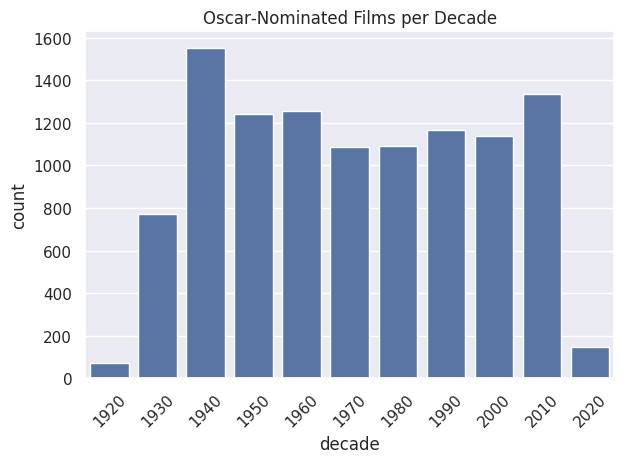

In [ ]:
df["decade"] = (df["year_ceremony"] // 10) * 10
sns.countplot(x="decade", data=df, order=sorted(df["decade"].unique()))
plt.title("Oscar‑Nominated Films per Decade")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

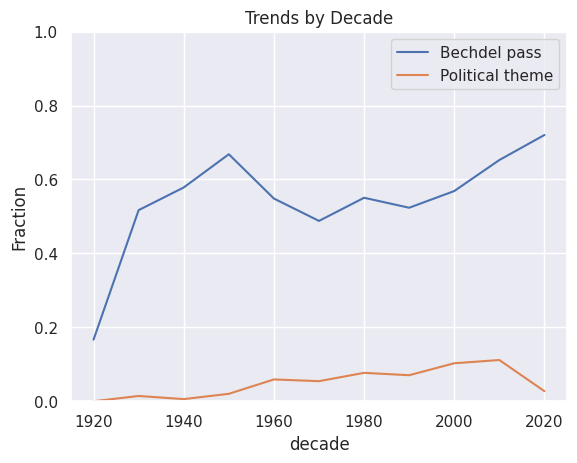

In [ ]:
bech = (
    df.dropna(subset=["bechdel_pass"])
      .groupby("decade")["bechdel_pass"]
      .mean()
)
pol = (
    df.groupby("decade")["political_theme"]
      .mean()
)
bech.plot(label="Bechdel pass"); pol.plot(label="Political theme")
plt.ylim(0, 1); plt.ylabel("Fraction"); plt.legend()
plt.title("Trends by Decade"); plt.show()


<ipython-input-29-6662a972f982>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot["bechdel_pass"] = df_plot["bechdel_pass"].fillna(False).astype(str)


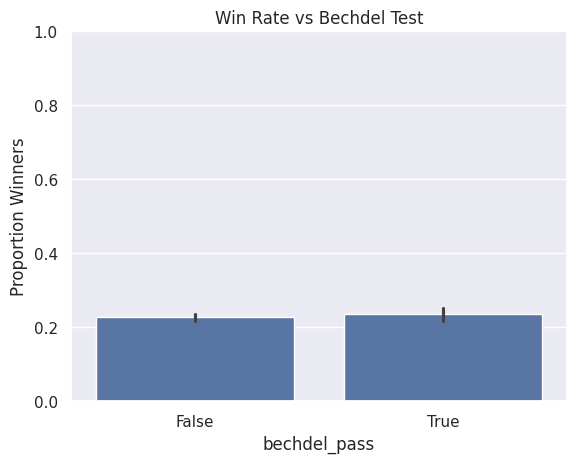

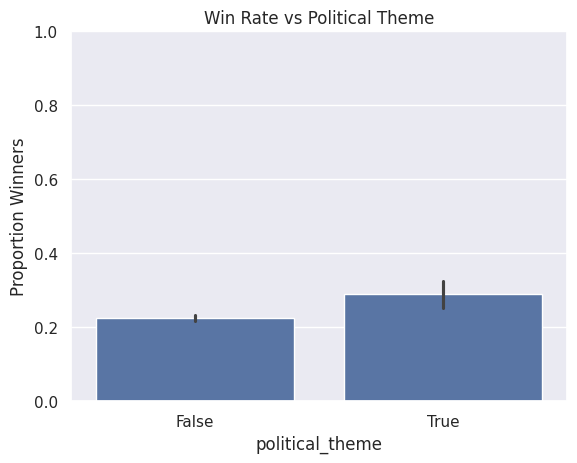

In [ ]:
df_plot = df.copy()
df_plot["bechdel_pass"] = df_plot["bechdel_pass"].fillna(False).astype(str)
df_plot["political_theme"] = df_plot["political_theme"].astype(str)

for col, title in [("bechdel_pass", "Bechdel Test"),("political_theme", "Political Theme")]:
    sns.barplot(x=col, y="winner", data=df_plot, estimator="mean")
    plt.ylim(0, 1); plt.ylabel("Proportion Winners")
    plt.title(f"Win Rate vs {title}"); plt.show()

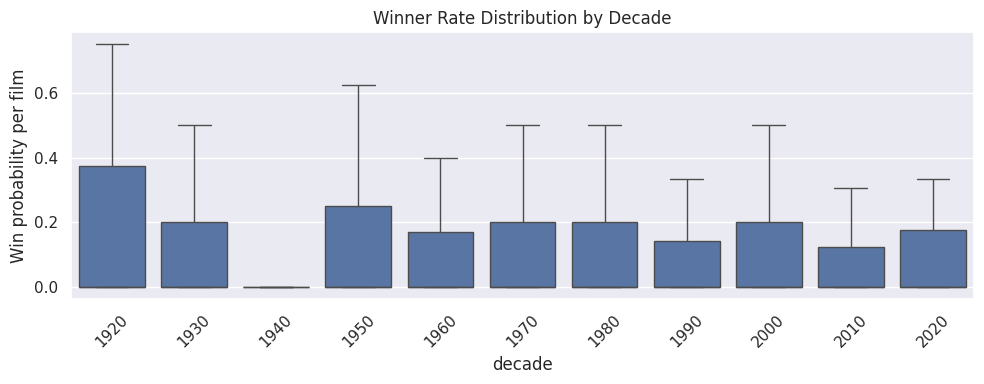

In [ ]:
dec_win = (
    df.groupby(["decade", "film"])["winner"]
      .mean()                                 # 1 = winner, 0 = not
      .reset_index()
)
plt.figure(figsize=(10,4))
sns.boxplot(x="decade", y="winner", data=dec_win, showfliers=False)
plt.ylabel("Win probability per film"); plt.title("Winner Rate Distribution by Decade")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

<ipython-input-31-82c9cf01449e>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  num_df[col] = num_df[col].fillna(False).astype(int)


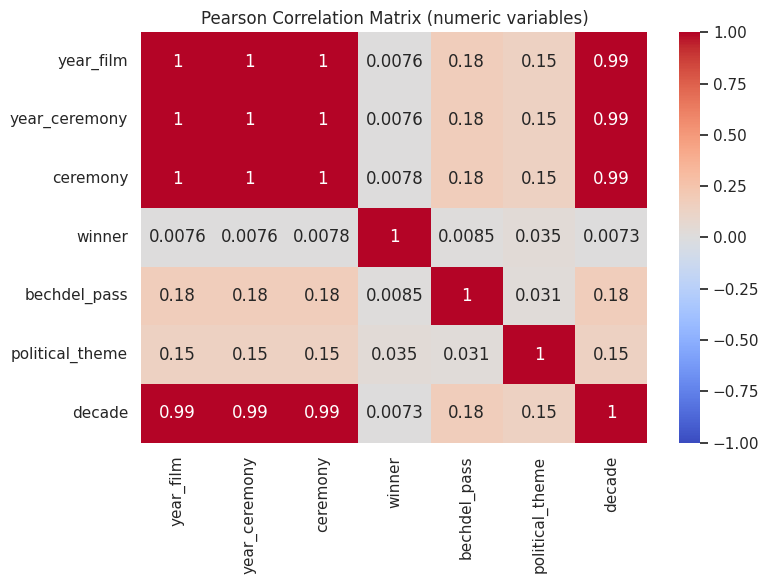

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

num_df = df.copy()


bool_cols = ["winner", "bechdel_pass", "political_theme"]

for col in bool_cols:
    num_df[col] = num_df[col].fillna(False).astype(int)

corr_mat = num_df.select_dtypes(include="number").corr(method="pearson")

plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix (numeric variables)")
plt.tight_layout()
plt.show()